<a href="https://colab.research.google.com/github/acmachado14/CircuitosCombinacionais/blob/main/C%C3%B3pia_de_TP03_Valgrind_Simulador_de_Cache_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valgrind e  Simulação de Cache: **Cachegrind**


## Inicialização

Primeiro, configurar o laboratório.

In [ ]:
!pip install git+https://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-flg954yb
  Running command git clone -q https://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-flg954yb
  Created wheel for ColabPlugin: filename=ColabPlugin-blind-py3-none-any.whl size=12727 sha256=deb3ff31922822fc4c5e8fb29a39273f8f750089263046678bb809dfbea3076f
  Stored in directory: /tmp/pip-ephem-wheel-cache-veubq6vp/wheels/06/76/5f/88825d3256ab9fe9e4386e23ad33a2c41a2e4dc94f0addff44
Failed to build ColabPlugin
    Running setup.py install for ColabPlugin ... done
  DEPRECATION: ColabPlugin was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 1

## Cache de inicialização do sistema

Valgrind quando simula a cache ele também simula a inicialização do sistema.
Então para conseguir comparar os resultados corretamente caso a diferença entre a inicialização do sistema e seu teste seja pequeno deve fazer com que o algoritmo trabalhe mais vezes.

In [ ]:
%%cachegrind --D1=1024,8,32 --I1=32768,2,32 --LL=65536,2,32 --file

int main(int argc, char const *argv[]) {
  //# Código vazio
}


I1  miss rate:      0.09%
LLi miss rate:      0.09%

D   refs:      1,203,251  (771,955 rd   + 431,296 wr)
D1  misses:      286,881  (222,602 rd   +  64,279 wr)
LLd misses:       48,111  ( 21,279 rd   +  26,832 wr)
D1  miss rate:      23.8% (   28.8%     +    14.9%  )
LLd miss rate:       4.0% (    2.8%     +     6.2%  )

LL refs:         290,449  (226,170 rd   +  64,279 wr)
LL misses:        51,612  ( 24,780 rd   +  26,832 wr)
LL miss rate:        1.0% (    0.5%     +     6.2%  )


# Variando o tamanho da Cache e visualizando falhas e taxa de falhas

A extensão **\%\%rangecachegrind** executa várias vezes com tamanhos de cache especificados pela lista **datacache=(4,8,16,32)**, em Kbytes. O usuário especifica a associatividade (**ways**) e o tamanho do linha  (**line**), os gráficos são gerados de forma automática.

# Teste base:
Utilizando os dados de Datacache ways e line basicos temos o seguinte resultado para o algoritmo otimizado de multiplicação de matrizes:

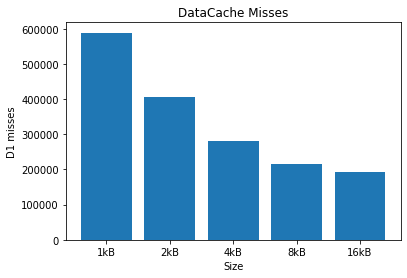

In [ ]:
%%rangecachegrind datacache=(1,2,4,8,16); ways=2; line=32; bargraph=(misses)

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define tamanho 100

int main(){
    int matriz1[tamanho][tamanho], matriz2[tamanho][tamanho];

    int matrizResultado[tamanho][tamanho];
    for (int i = 0; i < tamanho; i++){
        for (int j = 0; j < tamanho; j++){
            matriz1[i][j] = rand() % 10;
            matriz2[i][j] = rand() % 10;
            matrizResultado[i][j] = 0;
        }
    }

    for(int i = 0; i < tamanho; i++){
        for(int k = 0; k < tamanho; k++){
            for(int j = 0; j < tamanho; j++){
                matrizResultado[i][j] = matrizResultado[i][j] + matriz1[i][k] * matriz2[k][j];
            }
        }
    }
}

# Tarefa

Variando os valores da cache de dados, ways e a lines e comparando resultados.

# Teste 01 -
Valores utilizados:

**Datacache**: 8,32,64,512,1024;

**Ways**: 8

**Line**: 64

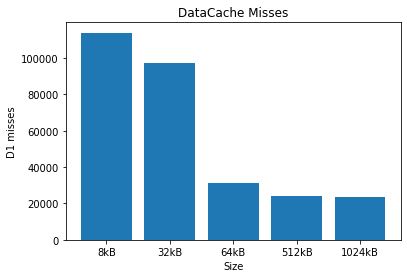

In [ ]:
%%rangecachegrind datacache=(8,32,64,512,1024); ways=8; line=64; bargraph=(misses)

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define tamanho 100

int main(){
    int matriz1[tamanho][tamanho], matriz2[tamanho][tamanho];

    int matrizResultado[tamanho][tamanho];
    for (int i = 0; i < tamanho; i++){
        for (int j = 0; j < tamanho; j++){
            matriz1[i][j] = rand() % 10;
            matriz2[i][j] = rand() % 10;
            matrizResultado[i][j] = 0;
        }
    }

    for(int i = 0; i < tamanho; i++){
        for(int k = 0; k < tamanho; k++){
            for(int j = 0; j < tamanho; j++){
                matrizResultado[i][j] = matrizResultado[i][j] + matriz1[i][k] * matriz2[k][j];
            }
        }
    }

    return 0;
}

# Teste 02 -
Valores utilizado:

**Datacache**: 8,1024,5000;

**Ways**: 2

**Line**: 32

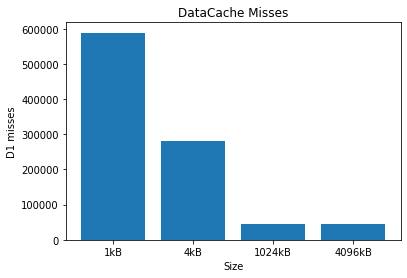

In [ ]:
%%rangecachegrind datacache=(1,4,1024,4096); ways=2; line=32; bargraph=(misses)

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define tamanho 100

int main(){
    int matriz1[tamanho][tamanho], matriz2[tamanho][tamanho];

    int matrizResultado[tamanho][tamanho];
    for (int i = 0; i < tamanho; i++){
        for (int j = 0; j < tamanho; j++){
            matriz1[i][j] = rand() % 10;
            matriz2[i][j] = rand() % 10;
            matrizResultado[i][j] = 0;
        }
    }

    for(int i = 0; i < tamanho; i++){
        for(int k = 0; k < tamanho; k++){
            for(int j = 0; j < tamanho; j++){
                matrizResultado[i][j] = matrizResultado[i][j] + matriz1[i][k] * matriz2[k][j];
            }
        }
    }

    return 0;
}

# Explicação dos resultados:

# Resultados do Algoritmo:
Algoritmo otimizado de Multiplicação de matrizes
de tamanho 100

In [ ]:
%%cachegrind --D1=1024,8,32 --I1=32768,2,32 --LL=65536,2,32 --file
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define tamanho 100

int main(){
    int matriz1[tamanho][tamanho], matriz2[tamanho][tamanho];

    int matrizResultado[tamanho][tamanho];
    for (int i = 0; i < tamanho; i++){
        for (int j = 0; j < tamanho; j++){
            matriz1[i][j] = rand() % 10;
            matriz2[i][j] = rand() % 10;
            matrizResultado[i][j] = 0;
        }
    }

    for(int i = 0; i < tamanho; i++){
        for(int k = 0; k < tamanho; k++){
            for(int j = 0; j < tamanho; j++){
                matrizResultado[i][j] = matrizResultado[i][j] + matriz1[i][k] * matriz2[k][j];
            }
        }
    }

    return 0;
}


I1  miss rate:       0.01%
LLi miss rate:       0.01%

D   refs:      15,894,802  (14,263,124 rd   + 1,631,678 wr)
D1  misses:       421,931  (   353,991 rd   +    67,940 wr)
LLd misses:        55,968  (    25,482 rd   +    30,486 wr)
D1  miss rate:        2.7% (       2.5%     +       4.2%  )
LLd miss rate:        0.4% (       0.2%     +       1.9%  )

LL refs:          425,529  (   357,589 rd   +    67,940 wr)
LL misses:         59,500  (    29,014 rd   +    30,486 wr)
LL miss rate:         0.1% (       0.0%     +       1.9%  )


### Versão ruim
Algoritmo de multiplicação de matrizes sem otimização de tamanho 100

In [ ]:
%%cachegrind --D1=1024,8,32 --I1=32768,2,32 --LL=65536,2,32 --file
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define tamanho 100

int main(){
    int matriz1[tamanho][tamanho], matriz2[tamanho][tamanho];

    int matrizResultado[tamanho][tamanho];
    for (int i = 0; i < tamanho; i++){
        for (int j = 0; j < tamanho; j++){
            matriz1[i][j] = rand() % 10;
            matriz2[i][j] = rand() % 10;
            matrizResultado[i][j] = 0;
        }
    }

    for(int i = 0; i < tamanho; i++){
        for(int j = 0; j < tamanho; j++){
            for(int k = 0; k < tamanho; k++){
                matrizResultado[i][j] = matrizResultado[i][j] + matriz1[i][k] * matriz2[k][j];
            }
        }
    }
}


I1  miss rate:       0.01%
LLi miss rate:       0.01%

D   refs:      15,894,802  (14,263,124 rd   + 1,631,678 wr)
D1  misses:     1,422,125  ( 1,354,179 rd   +    67,946 wr)
LLd misses:        56,515  (    26,029 rd   +    30,486 wr)
D1  miss rate:        8.9% (       9.5%     +       4.2%  )
LLd miss rate:        0.4% (       0.2%     +       1.9%  )

LL refs:        1,425,723  ( 1,357,777 rd   +    67,946 wr)
LL misses:         60,047  (    29,561 rd   +    30,486 wr)
LL miss rate:         0.1% (       0.0%     +       1.9%  )


### Comparação
Como pode-se observar a diferença é bem vizível entre as duas verções onde a porcentagem de erro de D1 é 2,7% no algoritmo otimizado e é de 8,4% no ruim nos mostrando que a otimização foi feita com sucesso.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Comparação de gráficos 
Agora temos os gráficos de teste base e os com os valores:
## Teste Base 
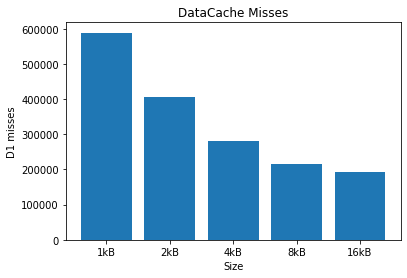
## Teste 01
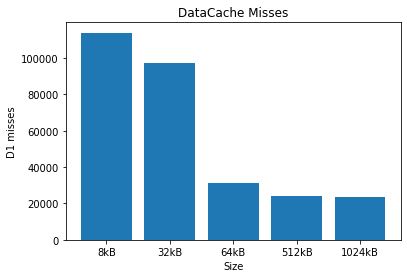
## Teste 02
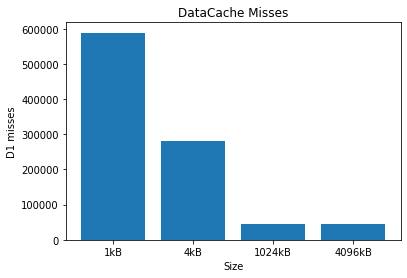

# Análise de Gráficos
Pode-se observar que o numero de erros de D1 ele é proporcional a Datacache disponível, variando bastante nos valores menores e quando chega a um certo ponto ela não varia tanto, independente de quanto aumenta o valor selecionado.